**Datenbankabfragen**

*Aufgabenblatt*

*Sommersemester 2021*



---
**Vorbereitung** 

Nutzen Sie für die nachfolgenden Aufgaben die bereits eingebundene SQLite Datenbank "movies.db". Die Datenbank hat lediglich eine Tabelle "movies", welche wir für alle Abfragen nutzen werden. Machen Sie sich ein wenig mit den verschiedenen Spalten der Tabelle vertraut; es wird davon ausgegangen, dass diese selbsterklärend sind.









In [ ]:
import sys
!{sys.executable} -m pip install ipython-sql > /dev/null
%reload_ext sql
%sql sqlite:///../Material/movies.db

**Aufgabe 1: Syntax**

*(5 P.)*

Bringen Sie die nachfogenden Bestandteile des SELECT-Befehls in die richtige Reihenfolge.


---
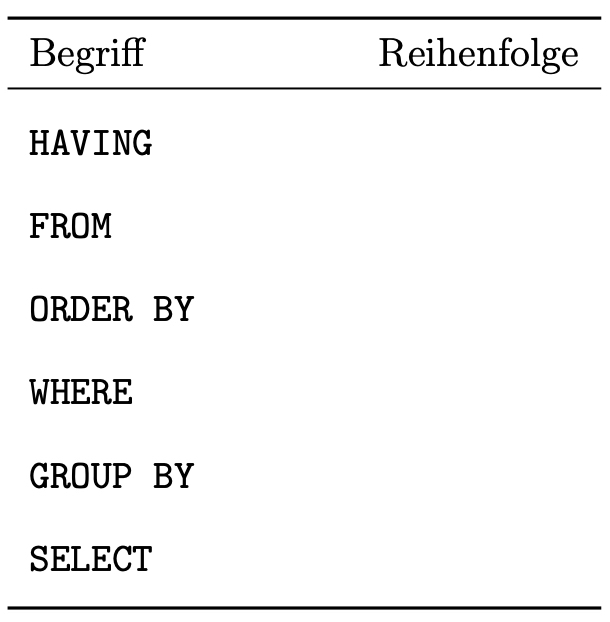



**Aufgabe 2: Einfache Abfrage**

*(5 P.)*

Erstellen Sie eine Abfrage, welche alle Filme und ihr jeweiliges Erscheindungsjahr aus der Datenbank ausliest. Das Ergebnis der Abfrage müsste aussehen, wie in Abbildung 1 dargestellt. 

Hinweis: Wir wir besprochen haben, ist die Sortierung bei SELECT-Befehlen nicht verlässlich, sofern keine expliziete Vorgabe (ORDER BY) gemacht wird. Das bedeutet, die Ergebnisse können bei Ihnen evtl. abweichend sortiert sein, als hier abgebildet.


---

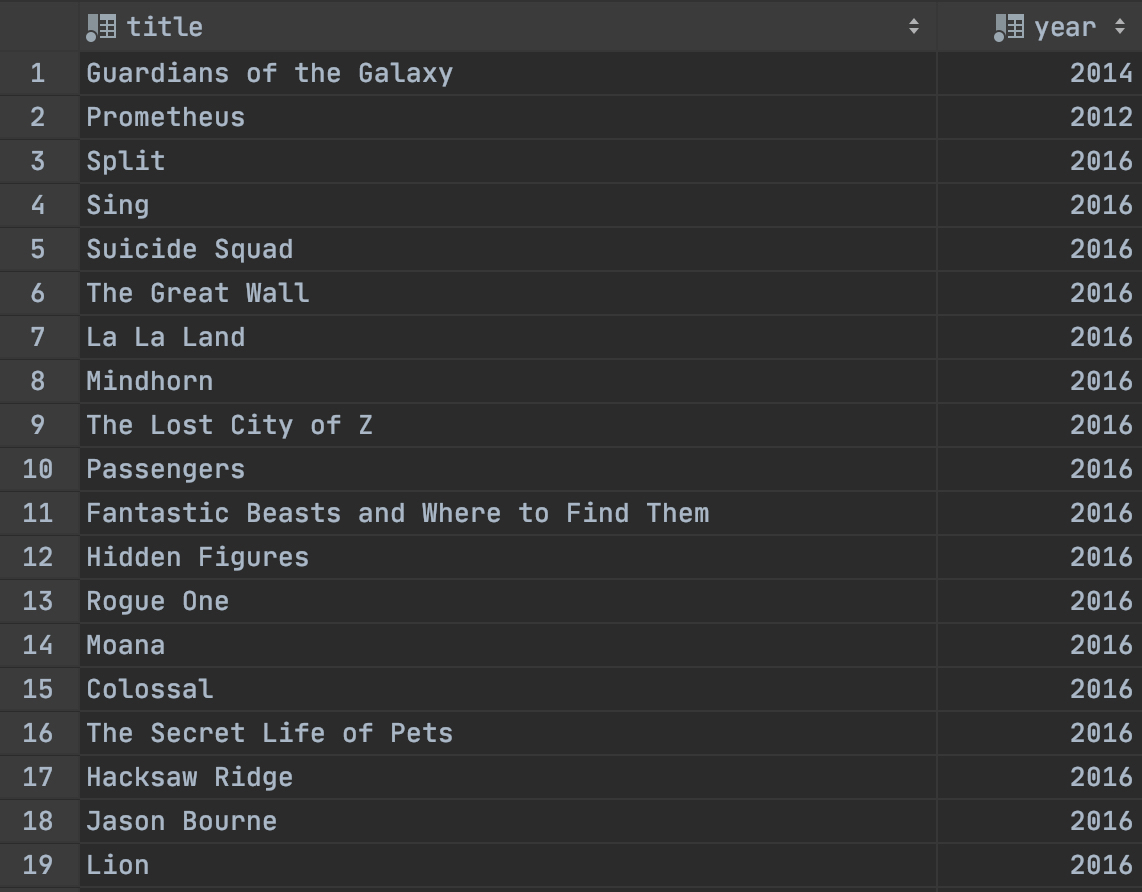
Abbildung 1: Ergebnis Aufgabe 2 (erste Zeilen)

In [ ]:
%%sql

SELECT title, year 
FROM movies;

**Aufgabe 3: Abfrage mit Sortierung**

*(5 P.)*

Erstellen Sie eine Abfrage, welche die ersten 100 Filme in alphabetischer Reihenfolge ausgibt. Das Ergebnis der Abfrage müsste aussehen, wie in Abbildung 2 dargestellt.


---

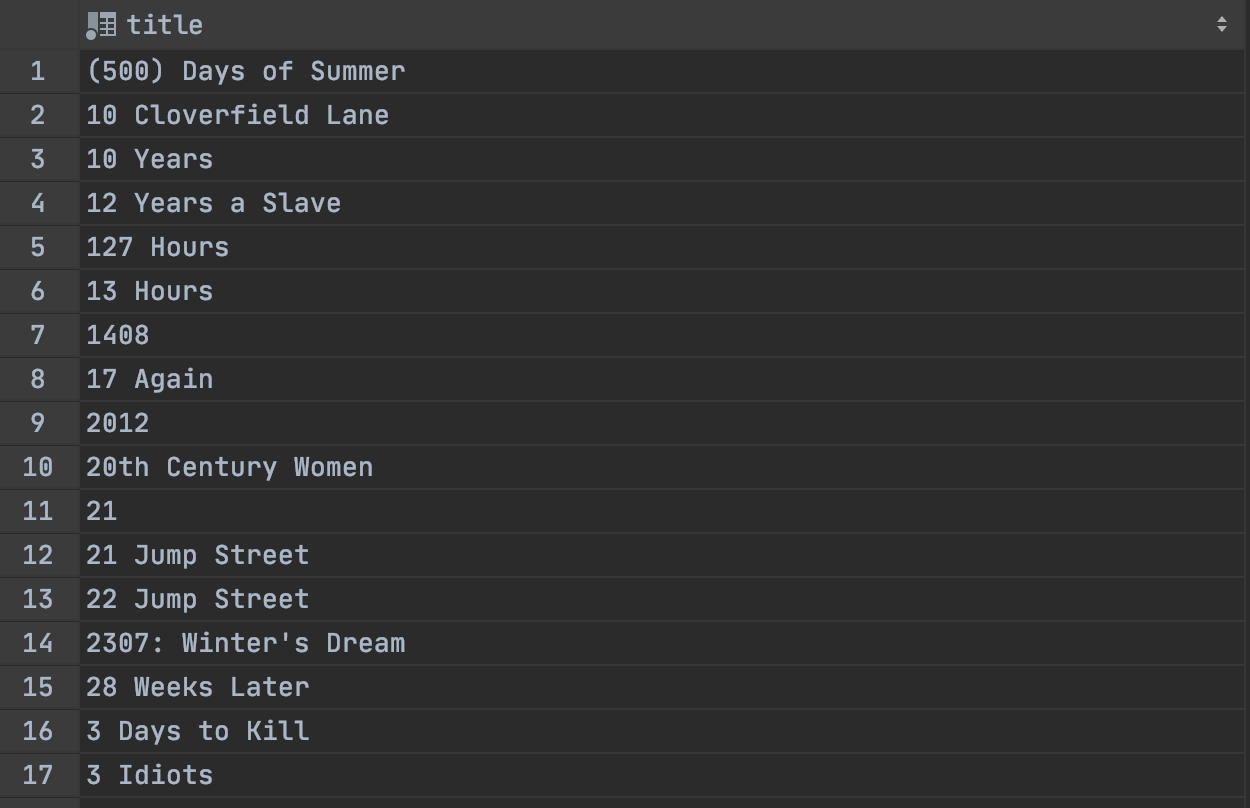
Abbildung 2: Ergebnis Aufgabe 3(erste Zeilen)

In [ ]:
%%sql

SELECT title 
FROM movies
ORDER BY title ASC
LIMIT 100;

**Aufgabe 4: Abfrage mit Sortierung und Paginierung**

*(10 P.)*

Erstellen Sie eine Abfrage, welche die Filme nach ihrer Bewertung (Attribut rating) sortiert ausgibt. Die Ausgabe soll den Titel des Films und seine Bewertung enthalten und die Filme mit der besten Bewertung sollen am Beginn der Liste stehen. Die Ausgabe soll nicht alle Filme, sondern lediglich die auf den Rängen 21 bis 30 enthalten. Das Ergebnis der Abfrage müsste aussehen, wie in Abbildung 3 dargestellt.


---

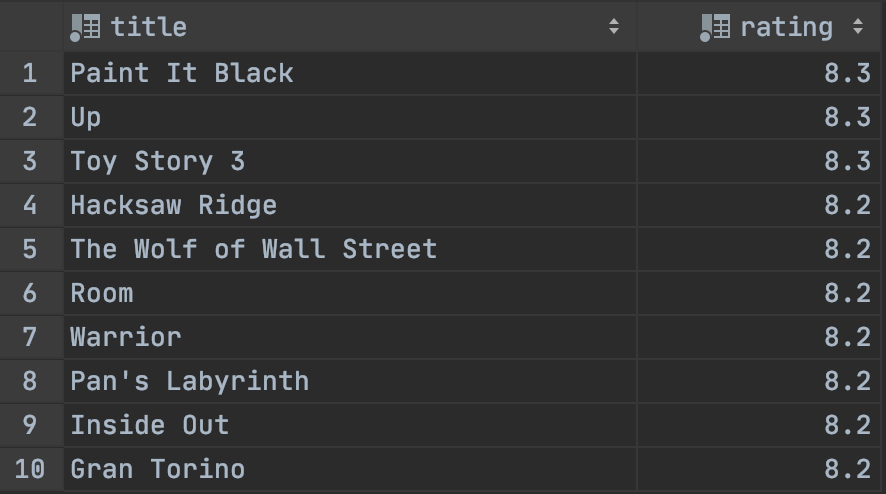
Abbildung 3: Ergebnis der Aufgabe 4


In [ ]:
%%sql

SELECT title, rating
FROM movies
ORDER BY rating DESC
LIMIT 10
OFFSET 20;

**Aufgabe 5: Abfrage mit Funktionen und Operatoren**

*(10 P.)*

Erstellen Sie eine Abfrage, welche die unterschiedlichen Genres in alphabetischer Sortierung ausgibt. Jedes Genre soll lediglich einmal in der Ergebnisliste auftauchen, auch wenn es mehrere Filme in diesem Genre gibt. Das Ergebnis der Abfrage müsste aussehen, wie in Abbildung 4 dargestellt.

---
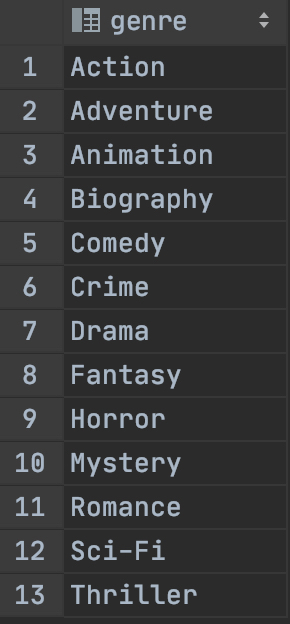

Abbildung 4: Ergebnis Aufgabe 5


In [ ]:
%%sql

SELECT distinct genre
FROM movies
ORDER BY genre ASC;

Aufgabe 6: Abfrage mit Gruppierung

(10 P.)

Geben Sie alle Genres und die zugehörige Gesamtzahl an Filmen in diesem Genre aus. 

Hinweis: Stellen Sie sicher, dass Sie ein eindeutiges Attribut zählen, wenn Sie die Gesamtzahl ermitteln möchten. Das Ergebnis der Abfrage müsste aussehen, wie in Abbildung 5 dargestellt.


---
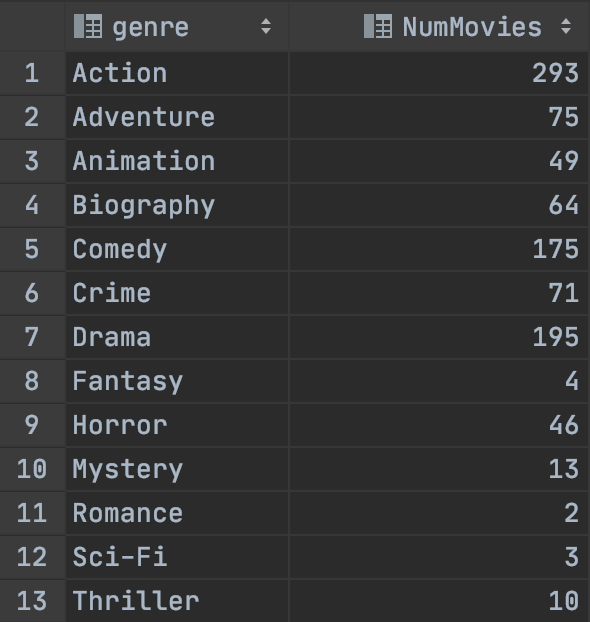

Abbildung 5: Ergebnis Aufgabe 6

In [ ]:
%%sql

SELECT genre, COUNT(*) AS NumMovies
FROM movies
GROUP BY genre
ORDER BY genre ASC;

**Aufgabe 7: Komplexe Abfrage mit Gruppierung**

*(15 P.)*

Geben Sie alle Regisseure von Actionfilmen und die zugehörige durchschnittliche Bewertung dieser Actionfilme aus. Sortieren Sie die Liste nach der besten Durchschnittsbewertung und geben Sie nur die Regisseure aus, die mindestens eine Durchschnittsbewertung von 7,5 für ihre Actionfilme haben. Das Ergebnis der Abfrage müsste aussehen, wie in Abbildung 6 dargestellt.


---
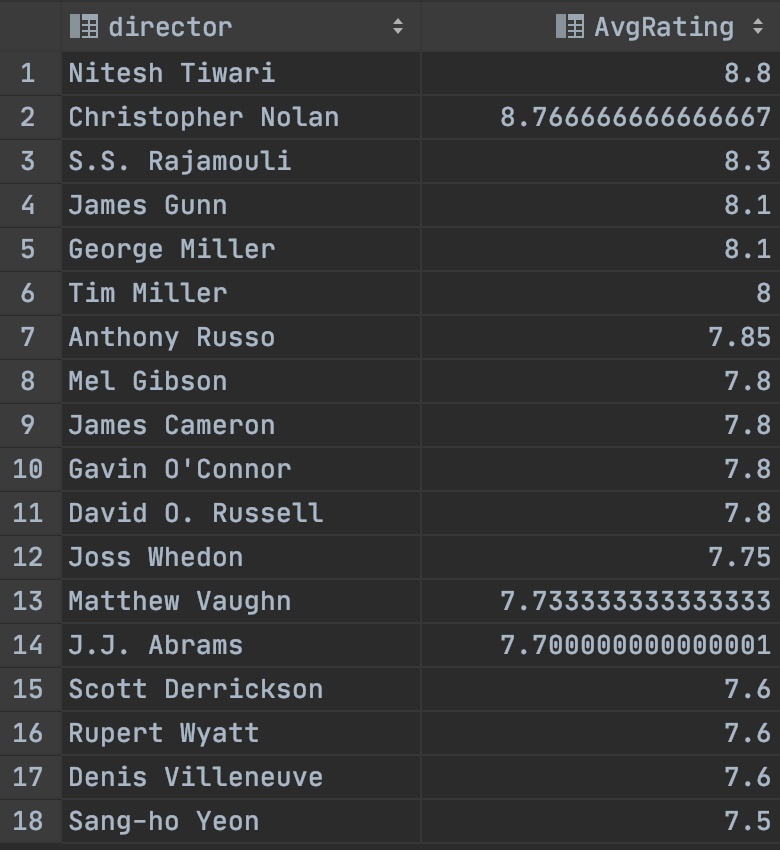

Abbildung 6: Ergebnis Aufgabe 7

In [ ]:
%%sql

SELECT director, AVG(rating)AS AvgRating
FROM movies
WHERE genre = "Action"
GROUP BY director
HAVING AvgRating >= 7.5
ORDER BY AvgRating DESC;

**Aufgabe 8: Bonusfrage**

*(20 P.)*

Ermitteln Sie alle Jahre, in denen es zu einem bestimmten Genre 25 oder mehr Filme gab, jedoch ohne Filme mit Vin Diesel zu berücksichtigen (seine Filme sind einfach zu schlecht!). Geben Sie auch das Genre und die Anzahl der Filme an und sortieren Sie die Liste absteigend nach der Anzahl der Filme. Das Ergebnis der Abfrage müsste aussehen, wie in Abbildung 7 dargestellt.


---
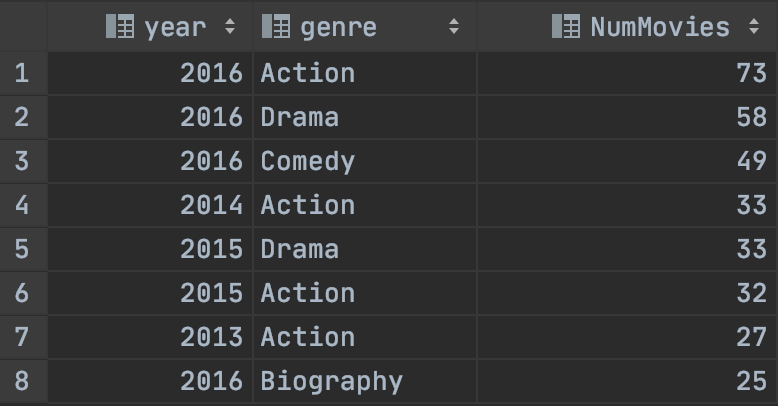

Abbildung 7: Ergebnis Aufgabe 8

In [ ]:
%%sql

SELECT year, genre, COUNT(*) AS NumMovies 
FROM movies 
WHERE actors NOT LIKE '%Vin Diesel%'
GROUP BY genre,year
HAVING NumMovies >=25 
ORDER BY NumMovies DESC;

**Notenspiegel**

Die nachfolgende Tabelle zeigt Ihnen, wie Ihre Leistung im Rahmen einer Klausur einzuordnen wäre.


---
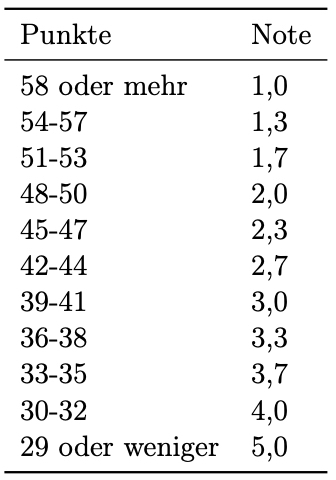
